In [1]:
import pandas as pd

In [6]:
from sklearn.datasets import load_digits

In [11]:
d=load_digits()

In [13]:
dir(d)

['DESCR', 'data', 'images', 'target', 'target_names']

In [8]:
import matplotlib.pyplot as plt

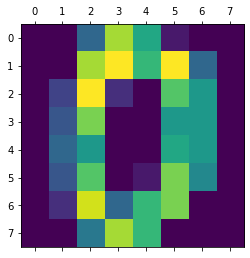

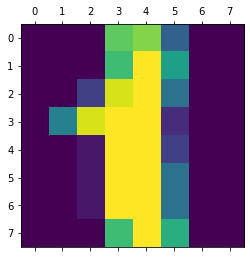

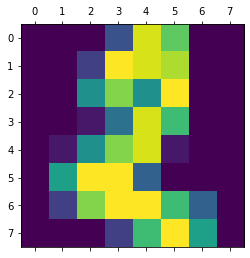

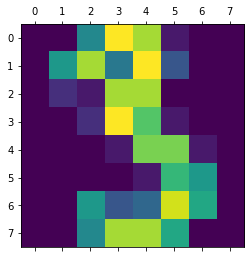

In [10]:
for i in range(4):
    plt.matshow(d.images[i])

In [18]:
data=pd.DataFrame(d.data)
data['target']=d.target
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [29]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['target']),data['target'],test_size=0.2)

In [36]:
#ensemble is used when you are using multiple algorithms 
from sklearn.ensemble import RandomForestClassifier

In [39]:
model=RandomForestClassifier( n_estimators=20)

In [40]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# n_estimators=10 it gives the number of tree the more trees will be used the more will be accuracy depending upon the input
model.score(x_test,y_test)

0.9638888888888889

In [45]:
y_pred=model.predict(x_test)

In [46]:
#confusion matrix allows you to print truth on one axis and predicted on the other

In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  1, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  1, 36,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 26]], dtype=int64)

In [57]:
import seaborn as sns
%matplotlib inline

<Figure size 10800x5040 with 0 Axes>

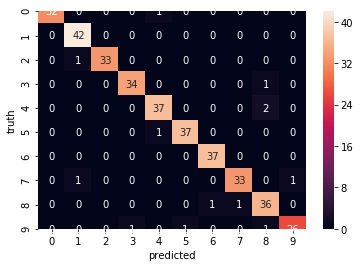

<Figure size 10800x5040 with 0 Axes>

In [63]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.figure(figsize=(150,70))